Project Tasks:

-Task 1: Familiarize yourself with the dataset 
-Task 2: (Optional) If you do not already have an instance of Watson Studio, create an IBM Cloud Lite account and provision an instance of Waston Studio.
-Task 3: Load the dataset in a Jupyter Notebook using Watson Studio.
-Task 4: Generate basic statistics and visualizations for upper management. 
-Task 5: Use the appropriate tests to answer the questions provided.
-Task 6: Share your Jupyter Notebook.

Import of needed libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.formula.api import ols
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
# download doesn't work --> Please use local copy of the file
#boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
#boston_df=pd.read_csv(boston_url)

In [3]:
# only for local copy usage
# reading data from csv
df = pd.read_csv('./boston_housing.csv')

# checking the data frame
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


The data fram is 506 rows × 14 columns with the columns as defined in the task

-CRIM - per capita crime rate by town
-ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
-INDUS - proportion of non-retail business acres per town.
-CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
-NOX - nitric oxides concentration (parts per 10 million)
-RM - average number of rooms per dwelling
-AGE - proportion of owner-occupied units built prior to 1940
-DIS - weighted distances to five Boston employment centres
-RAD - index of accessibility to radial highways
-TAX - full-value property-tax rate per $10,000
-PTRATIO - pupil-teacher ratio by town
-LSTAT - % lower status of the population
-MEDV - Median value of owner-occupied homes in $1000's

The following tasks were given:

-For the "Median value of owner-occupied homes" provide a boxplot
-Provide a  bar plot for the Charles river variable
-Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
-Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
-Create a histogram for the pupil to teacher ratio variable

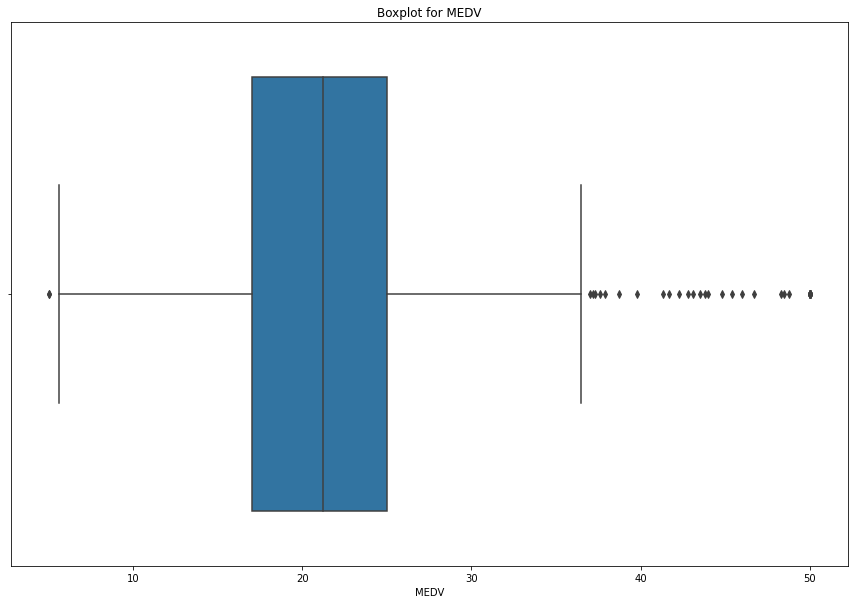

In [4]:
#Following straight forward the task „For the "Median value of owner-occupied homes" provide a boxplot
# defining figure size
plt.figure(figsize=(15,10))

# drawing a box plot to show distributions with respect to category MEDV, using seaborns boxplot function
sns.boxplot(x = df.MEDV)

# add the title
plt.title('Boxplot for MEDV')

# plot...
plt.show()

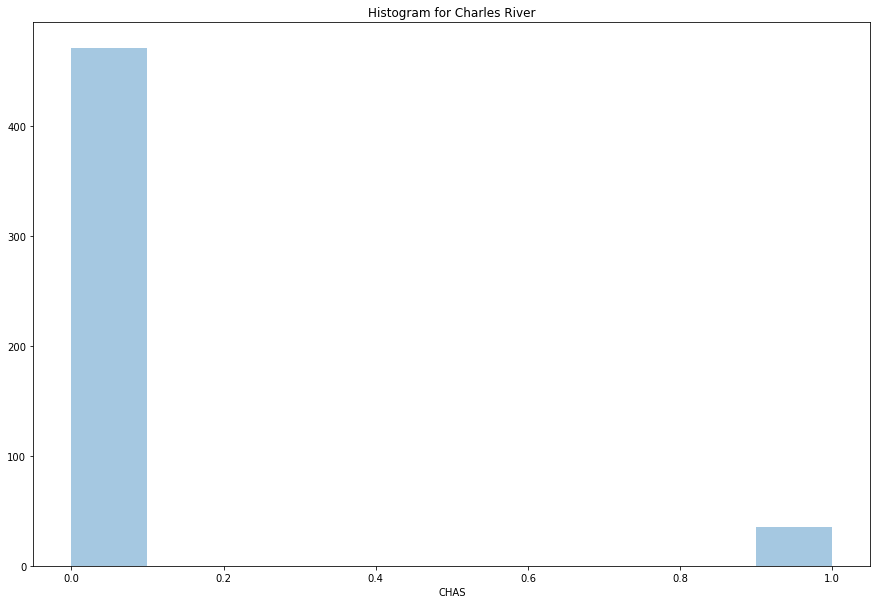

In [5]:
# and provide a histogram for the Charles river variable, as demanded
# defining figure size
plt.figure(figsize=(15,10))

# draw the histogram for CHAS, using seaborns distplot function
sns.distplot(a = df.CHAS,bins = 10, kde = False)

# add the title
plt.title('Histogram for Charles River')

# plot...
plt.show()

In [6]:
# Next task:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

# discretize the age variable in three groups
# group one:
df.loc[(df['AGE'] <= 35),'age_group'] = '35 years and younger'

# group two:
df.loc[(df['AGE'] > 35) & (df["AGE"]<70),'age_group'] = 'between 35 and 70 years'

# group three:
df.loc[(df['AGE'] >= 70),'age_group'] = '70 years and older'

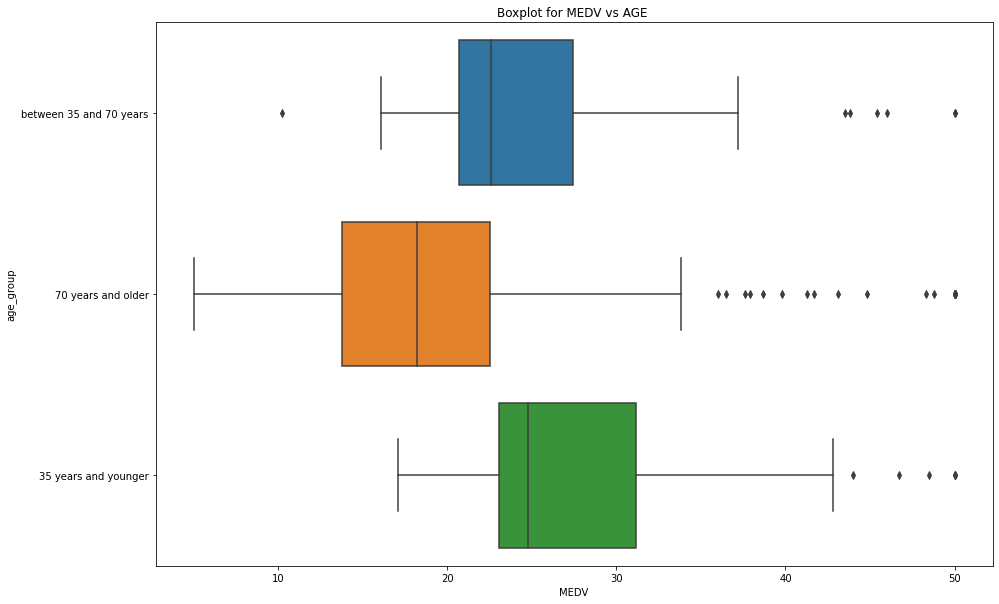

In [7]:
# creating the boxplot
plt.figure(figsize=(15,10))

# drawing a box plot to show distributions with respect to category MEDV and the discretized age variable in three groups, using seaborns boxplot function
sns.boxplot(x = df.MEDV, y = df.age_group, data = df)

# add the title
plt.title('Boxplot for MEDV vs AGE ')

# ... plot
plt.show()

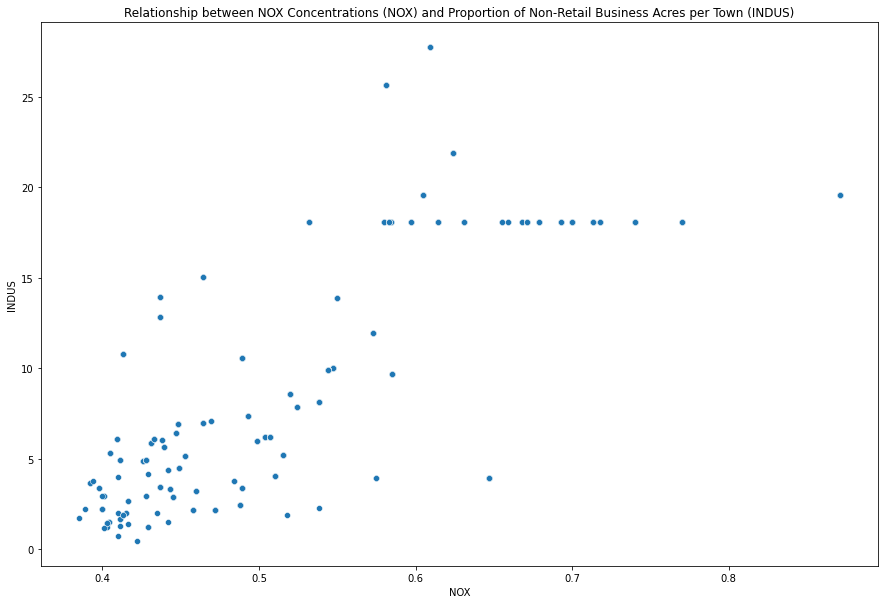

In [8]:
# Next task:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion
# of non-retail business acres per town. What can you say about the relationship?

plt.figure(figsize = (15,10))

# drawing a scatter plot to show scattering with respect to category NOX and the INDUS using seaborns scatterplot function
sns.scatterplot(x = df.NOX, y = df.INDUS, data = df)

# add the title
plt.title('Relationship between NOX Concentrations (NOX) and Proportion of Non-Retail Business Acres per Town (INDUS)')

# plot...
plt.show()

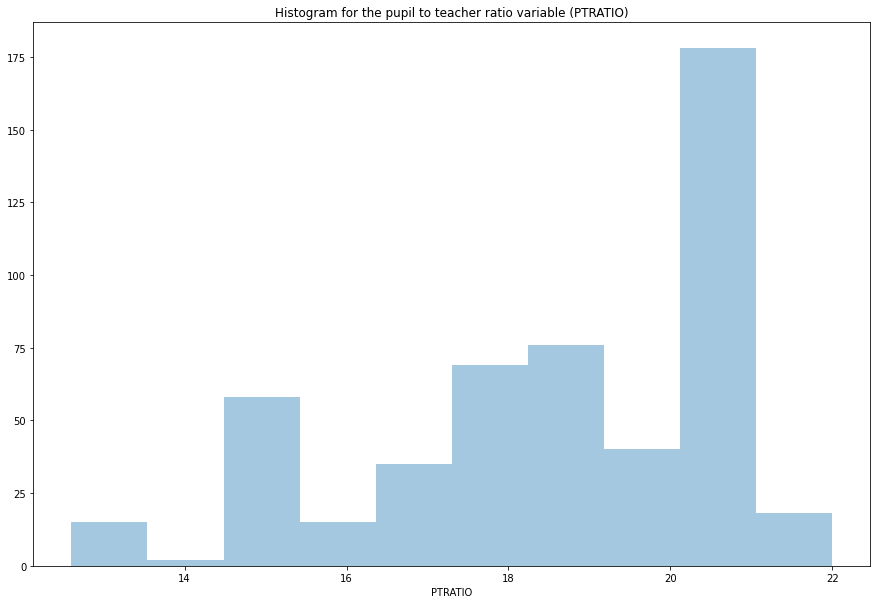

In [9]:
# Next task:
# Create a histogram for the pupil to teacher ratio variable
plt.figure(figsize = (15,10))

# draw the histogram with respect to PTRATIO using seaborns distplot function
sns.distplot(a = df.PTRATIO, bins=10, kde=False)

# add the title
plt.title('Histogram for the pupil to teacher ratio variable (PTRATIO)')

# ... plot
plt.show()

Overview of task for statistical evaluation

For each of the following questions:
-Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
-Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
-Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
-What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
-State your hypothesis.
-Use α = 0.05
-Perform the test Statistics.
-State the conclusion from the test.

First Task:
Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis: Both average MEDV are the same

In [10]:
# Alternative Hypothesis():
# creating a series containing counts of unique values
df['CHAS'].value_counts()

# creating two lists 'a' and 'b' for evaluation via t-test for CHAS == 0 and CHAS == 1
a = df[df['CHAS'] == 0]['MEDV']
b = df[df['CHAS'] == 1]['MEDV']

In [11]:
# checking a
a

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 471, dtype: float64

In [12]:
# checking b
b

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: MEDV, dtype: float64

In [13]:
# performing t-test, using scipy and the generated lists 'a' and 'b'
scipy.stats.ttest_ind(a, b, axis = 0, equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Since p-value p = 7.3906..... is more than alpha value of 0.05, we failed to reject null hypothesis --> there is NO statistical significance.

In [14]:
# Next task:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# creating a series containing counts of unique values of column 'AGE'
df['AGE'].value_counts()

100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: AGE, Length: 356, dtype: int64

In [15]:
# again grouping ages
# group one:
df.loc[(df['AGE'] <= 35),'age_group'] = '35 years and younger'

# group two:
df.loc[(df['AGE'] > 35) & (df["AGE"]<70),'age_group'] = 'between 35 and 70 years'

# group three:
df.loc[(df['AGE'] >= 70),'age_group'] = '70 years and older'

Null-Hypothesis: All aging classes have the same population mean

In [16]:
# separating the pre-defined groups in three classes, for the evaluation 
lower = df[df['age_group'] == '35 years and younger']['MEDV']
middle = df[df['age_group'] == 'between 35 and 70 years']['MEDV']
upper = df[df['age_group'] == '70 years and older']['MEDV']

# perform one-way ANOVA --> The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean.
# The test is applied to samples from two or more groups, possibly with differing sizes.
f_stats, p_value = scipy.stats.f_oneway(lower, middle, upper, axis = 0)

# print the result of the ANOVA
print('F-Statistic={0}, P-value={1}'.format(f_stats, p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


Since P-value = 1.7105011022702984e-15 more than alpha value of 0.05, we failed to reject Null Hypothesis --> there is NO statistical significance.

Next task:
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypotheses:
1.NOX is not correlated with INDUS

2.NOX is correlated with INDUS

In [17]:
# applying pearsons to 'NOX' and 'INDUS'
pearson,p_value = scipy.stats.pearsonr(df['NOX'],df['INDUS'])

# print the result of pearsons
print('Pearson Coefficient value={0}, P-value={1}'.format(pearson, p_value))

Pearson Coefficient value=0.7636514469209149, P-value=7.913361061240043e-98


Since the P-value=7.913361061240043e-98 < 0.05, we reject the Null Hypothesis
Additionally, we conclude that there exists a relationship between Nitric Oxide and non-retail business acres per town.

Next Task:
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null Hypothesis: Weighted distances to five Boston employment centres are not related to median value

Alternative Hypothesis: Weighted distances to five Boston employment centres are related to median value

In [18]:
# defining two series objects, based on columns 'MEDV' and 'DIS'
y = df['MEDV']
x = df['DIS']

# adding a column of ones to x for evaluation
x = sm.add_constant(x)

# applying Ordinary Least Squares to y and x
results = sm.OLS(y,x).fit()

# summarizing the results of the OLS
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        19:59:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# from the results above, we see that R-quared is 0.062 --> need to have R --> calculate the square root of R-squared
np.sqrt(0.062)

0.24899799195977465

The square root of R-squared is 0.24899799195977465 --> there is only a weak correlation between both features